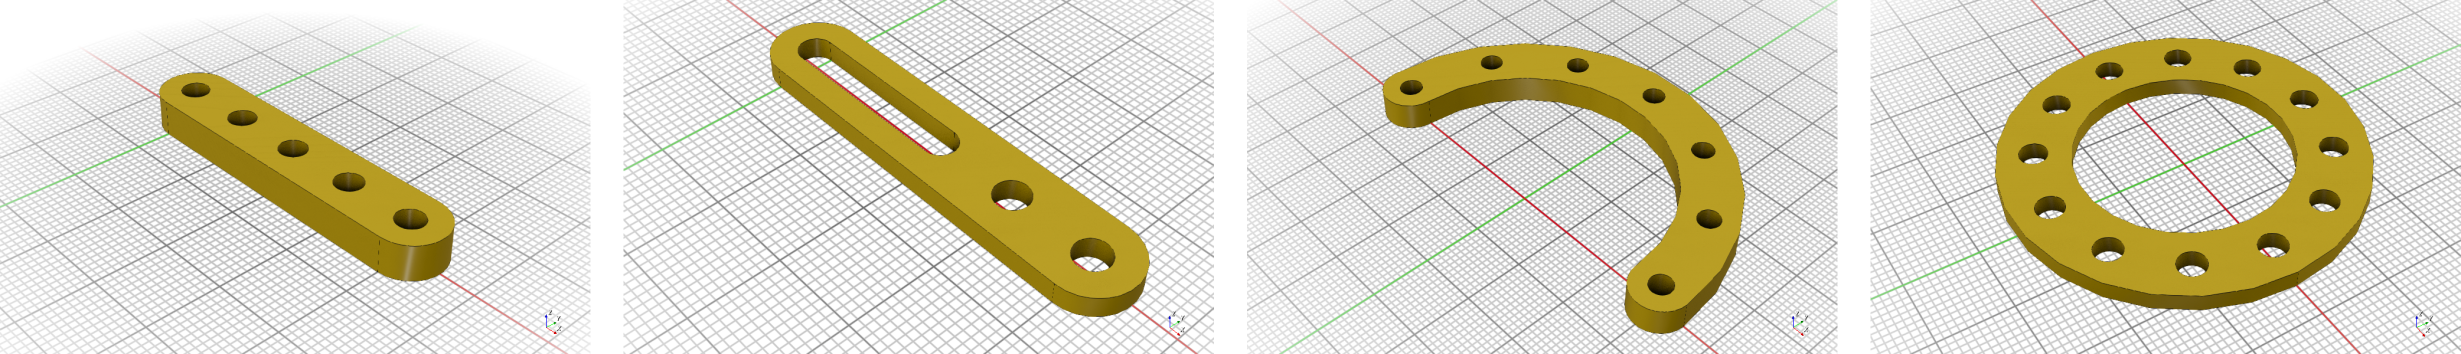

In [2]:
from IPython.display import Image
Image(filename='./img/image_brace.png', width=800)

# <font color='navy'> <i><b> Brace</i></b> </font>

Basic block components:

    Beam_Block(dim, center)
    Beam_Arc(diam, angle)          [ToDo]

Brace components:

    Brace(size, height, holes, center)
    Brace_Arc(radius, angle, height, holes, center)
    Brace_Circle(radius, height, holes, center)
    Brace_Plate(x,y,height)   [Todo]

Holes

    Hole(length)
    Hole_List([ [x1,y1], [x2,y2] ...], length)
    Hole_Grid(nx, ny, length, offs_x, offs_y, offs_z)
    Hole_Slot(size, height, center)

### <font color='teal'> Example </i></b> </font>

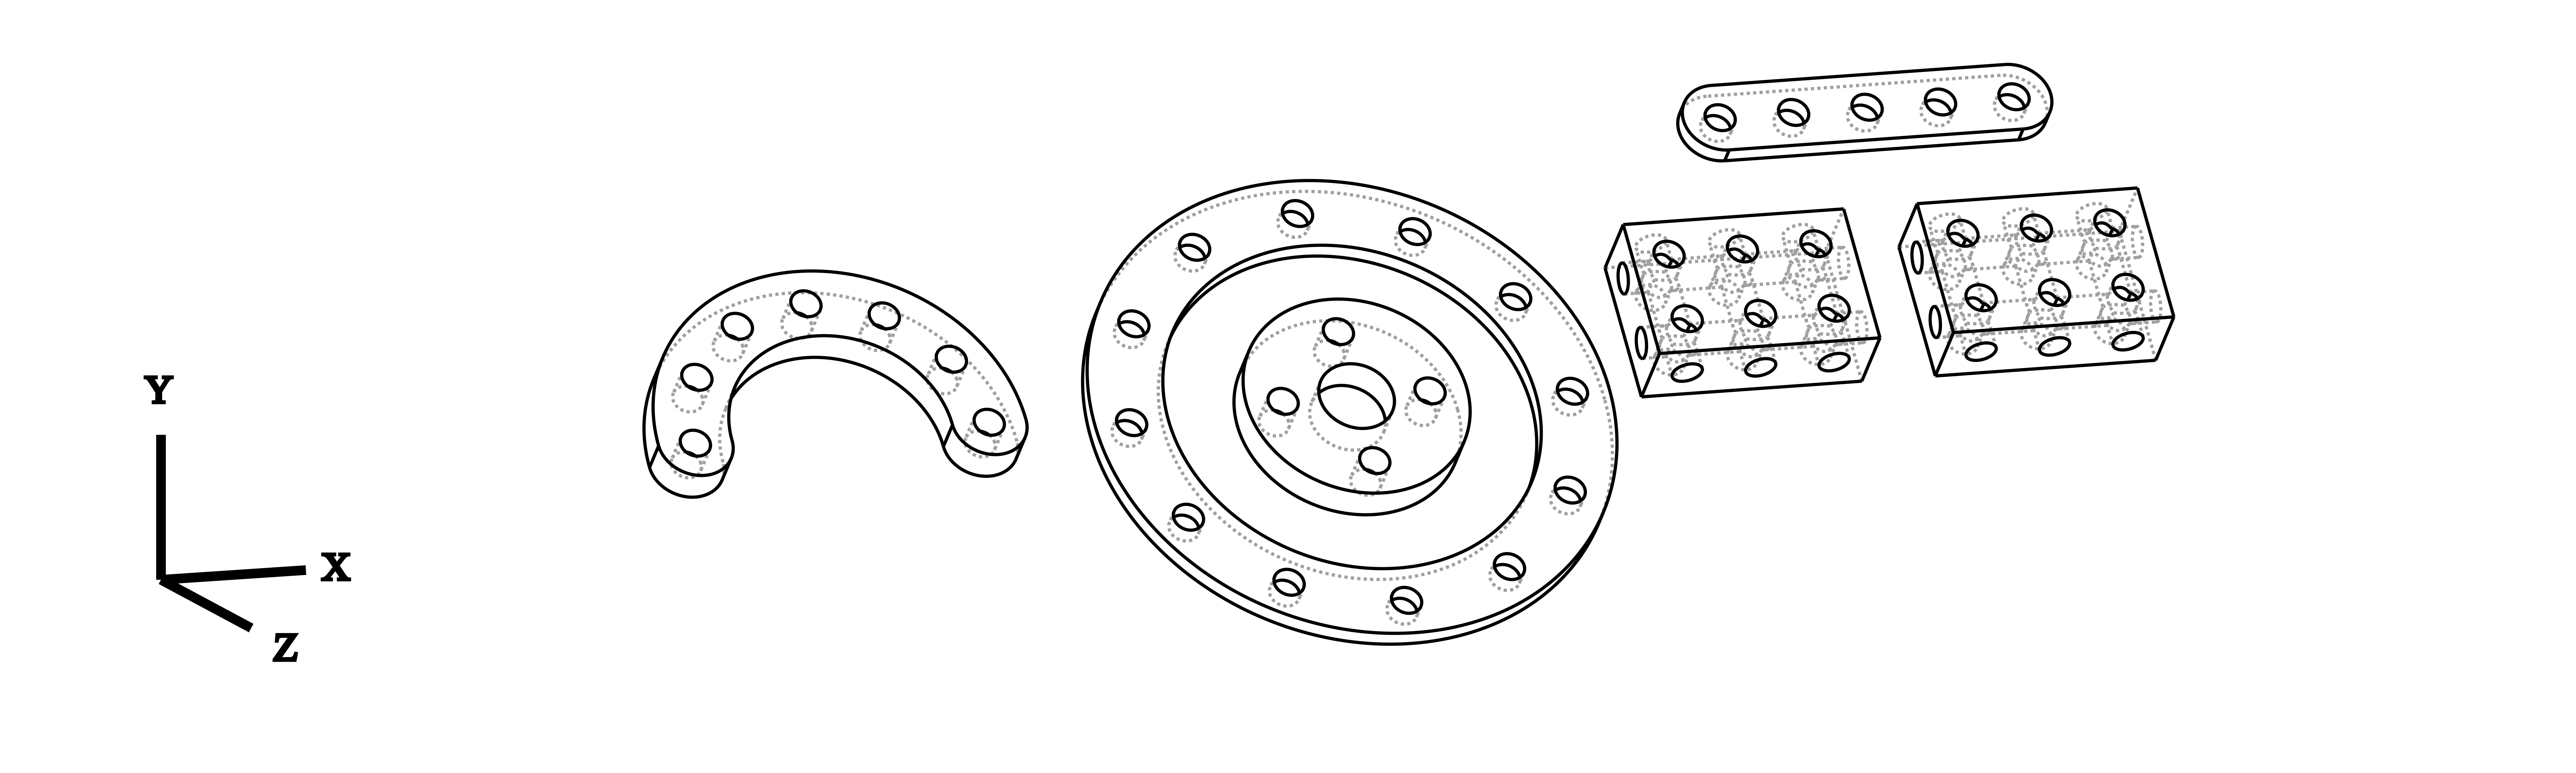

In [1]:
from lib import *

b1 = Beam_Block([3, 2 ,1], [True, True, True]) .BU_Tx(4).BU_Tx(4)

b2 = Beam_Block([3, 2 ,1], [True, True, True]).BU_Tx(4)

b3 = Brace(5).BU_Ty(4).BU_Tx(6)
b4 = Brace_Circle(1, 1/2, 4)
b5 = Brace_Circle(3, 1/4, 12)
b6 = Brace_Arc(2,180,1/2, 7).BU_Tx(-7)

b1 = b1.U([b2,b3,b4, b5, b6]).Rx(-45)


convert_to_image(b1,'./img/block')
Image('./img/block.png', width=800)